### Importare le librerie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import recall_score, precision_score,RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("credit_scoring.csv", index_col = "ID")

In [3]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET
count,338427.000000,3.384270e+05,338426.000000,338426.000000,338426.0,338426.000000,338426.000000,338426.000000,338426.000000,338427.000000
mean,0.428934,1.876543e+05,-15998.249644,60238.497163,1.0,0.211379,0.293302,0.105181,2.197228,0.087824
std,0.727990,1.106747e+05,4180.240053,138499.153147,0.0,0.408287,0.455276,0.306787,0.899570,0.283039
min,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19482.000000,-3116.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.620000e+05,-15622.000000,-1485.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12524.000000,-380.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


In [4]:
df.shape

(338427, 18)

Il dataframe è costituito da 18 colonne e 338427 righe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338427 entries, 5008804 to 6392180
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          338427 non-null  object 
 1   FLAG_OWN_CAR         338427 non-null  object 
 2   FLAG_OWN_REALTY      338427 non-null  object 
 3   CNT_CHILDREN         338427 non-null  int64  
 4   AMT_INCOME_TOTAL     338427 non-null  float64
 5   NAME_INCOME_TYPE     338427 non-null  object 
 6   NAME_EDUCATION_TYPE  338427 non-null  object 
 7   NAME_FAMILY_STATUS   338426 non-null  object 
 8   NAME_HOUSING_TYPE    338426 non-null  object 
 9   DAYS_BIRTH           338426 non-null  float64
 10  DAYS_EMPLOYED        338426 non-null  float64
 11  FLAG_MOBIL           338426 non-null  float64
 12  FLAG_WORK_PHONE      338426 non-null  float64
 13  FLAG_PHONE           338426 non-null  float64
 14  FLAG_EMAIL           338426 non-null  float64
 15  OCCUPATION

In [6]:
df.isnull().sum()

CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          1
NAME_HOUSING_TYPE           1
DAYS_BIRTH                  1
DAYS_EMPLOYED               1
FLAG_MOBIL                  1
FLAG_WORK_PHONE             1
FLAG_PHONE                  1
FLAG_EMAIL                  1
OCCUPATION_TYPE        103342
CNT_FAM_MEMBERS             1
TARGET                      0
dtype: int64

L'unico dato nullo presente nella maggior parte del dataframe può essere eliminato. 
Mentre per la collona OCCUPATION_TYPE sono presenti 103342 dati nulli che non possono essere eliminati rappresentando quasi un terzo del dataframe per cui è necessario approfondire e analizzarli.

In [7]:
print(df['NAME_INCOME_TYPE'].unique())
print(df['NAME_EDUCATION_TYPE'].unique())
print(df['NAME_FAMILY_STATUS'].unique())
print(df['NAME_HOUSING_TYPE'].unique())
print(df['OCCUPATION_TYPE'].unique())

['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree' 'Secondary / se']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow' nan]
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment' nan]
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


### Analisi della colonna OCCUPATION_TYPE

ID
5008804     -4542.0
5008805     -4542.0
5008812    365243.0
5008813    365243.0
5008814    365243.0
             ...   
6392175    365243.0
6392177    365243.0
6392178    365243.0
6392179    365243.0
6392180         NaN
Name: DAYS_EMPLOYED, Length: 103342, dtype: float64 ID
5008804      Working
5008805      Working
5008812    Pensioner
5008813    Pensioner
5008814    Pensioner
             ...    
6392175    Pensioner
6392177    Pensioner
6392178    Pensioner
6392179    Pensioner
6392180      Working
Name: NAME_INCOME_TYPE, Length: 103342, dtype: object


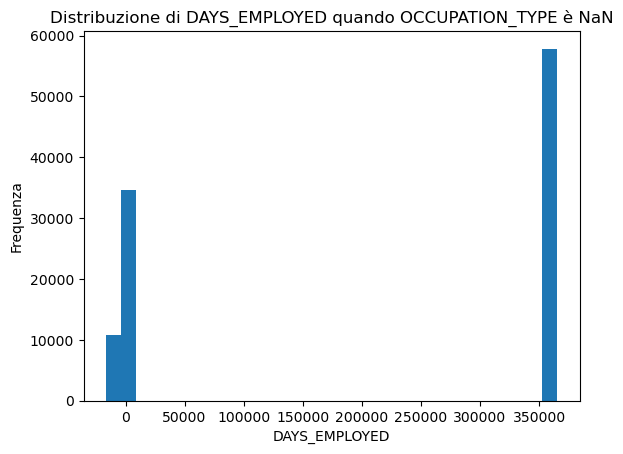

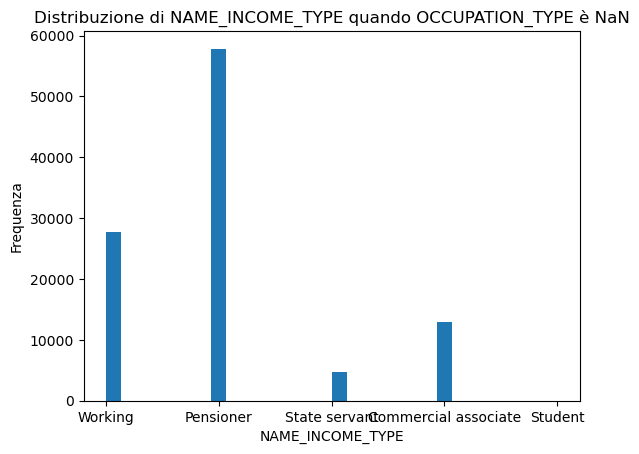

In [8]:
df_nan_occupation = df[df['OCCUPATION_TYPE'].isna()]
print(df_nan_occupation['DAYS_EMPLOYED'], df_nan_occupation['NAME_INCOME_TYPE'])

# Istogramma dei valori di DAYS_EMPLOYED per OCCUPATION_TYPE = NaN
plt.hist(df_nan_occupation['DAYS_EMPLOYED'], bins=30)
plt.title('Distribuzione di DAYS_EMPLOYED quando OCCUPATION_TYPE è NaN')
plt.xlabel('DAYS_EMPLOYED')
plt.ylabel('Frequenza')
plt.show()

plt.hist(df_nan_occupation['NAME_INCOME_TYPE'], bins=30)
plt.title('Distribuzione di NAME_INCOME_TYPE quando OCCUPATION_TYPE è NaN')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Frequenza')
plt.show()

Intrecciando le informazioni provenienti da DAYS_EMPLOYED e OCCUPATION_TYPE e da NAME_INCOME_TYPE e OCCUPATION_TYPE quando OCCUPATION_TYPE è NaN emerge che il reddito principale di queste perdone provenga dalla pensione, quindi l'occupazione può essere cambiata in pensionato mentre per gli altri può essere definita come "other".

In [9]:
df.loc[(df['OCCUPATION_TYPE'].isna()) & (df['DAYS_EMPLOYED'] < 0), 'OCCUPATION_TYPE'] = 'Other'
df.loc[(df['OCCUPATION_TYPE'].isna()) & (df['DAYS_EMPLOYED'] > 0), 'OCCUPATION_TYPE'] = 'Pensioner'

# Visualizza i risultati
print(df[['OCCUPATION_TYPE', 'DAYS_EMPLOYED']])
print(df['OCCUPATION_TYPE'].unique())

        OCCUPATION_TYPE  DAYS_EMPLOYED
ID                                    
5008804           Other        -4542.0
5008805           Other        -4542.0
5008806  Security staff        -1134.0
5008808     Sales staff        -3051.0
5008809     Sales staff        -3051.0
...                 ...            ...
6392175       Pensioner       365243.0
6392177       Pensioner       365243.0
6392178       Pensioner       365243.0
6392179       Pensioner       365243.0
6392180             NaN            NaN

[338427 rows x 2 columns]
['Other' 'Security staff' 'Sales staff' 'Pensioner' 'Accountants'
 'Laborers' 'Managers' 'Drivers' 'Core staff' 'High skill tech staff'
 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'Medicine staff' 'Secretaries'
 'Waiters/barmen staff' 'HR staff' 'Realty agents' 'IT staff' nan]


Procediamo con l'eliminazione delle righe nulle rimaste

In [10]:
df = df.dropna()

Riverifico che non ci siano dati nulli

In [11]:
df.isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
TARGET                 0
dtype: int64

## Analisi esplorativa del dataset

### Rappresentazione grafica variabili categoriche

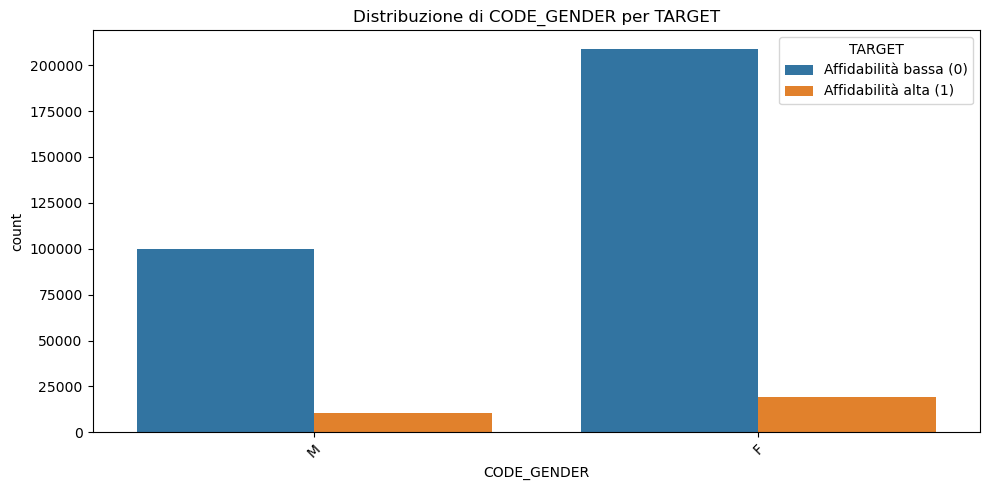

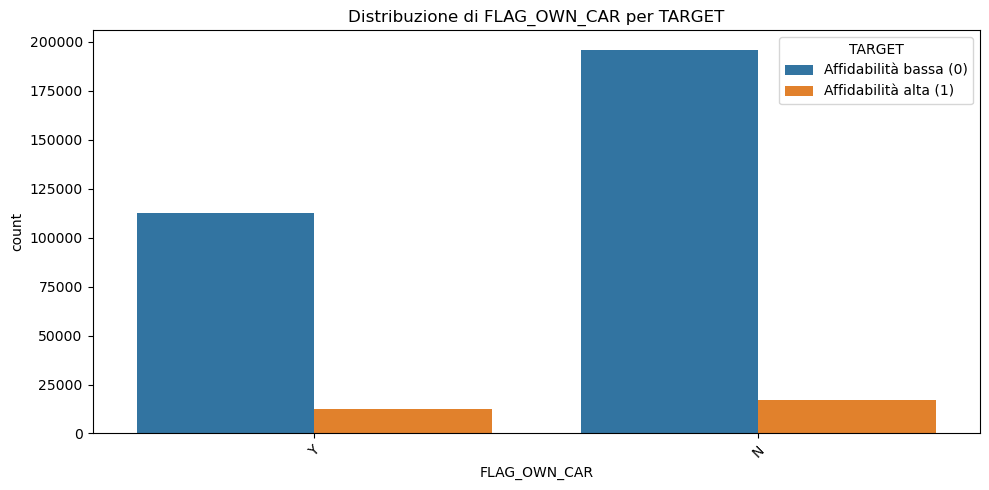

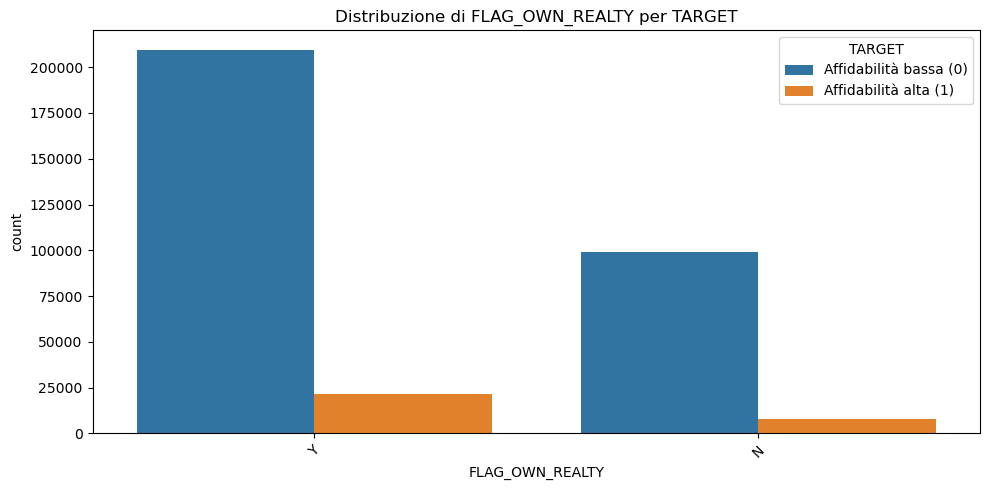

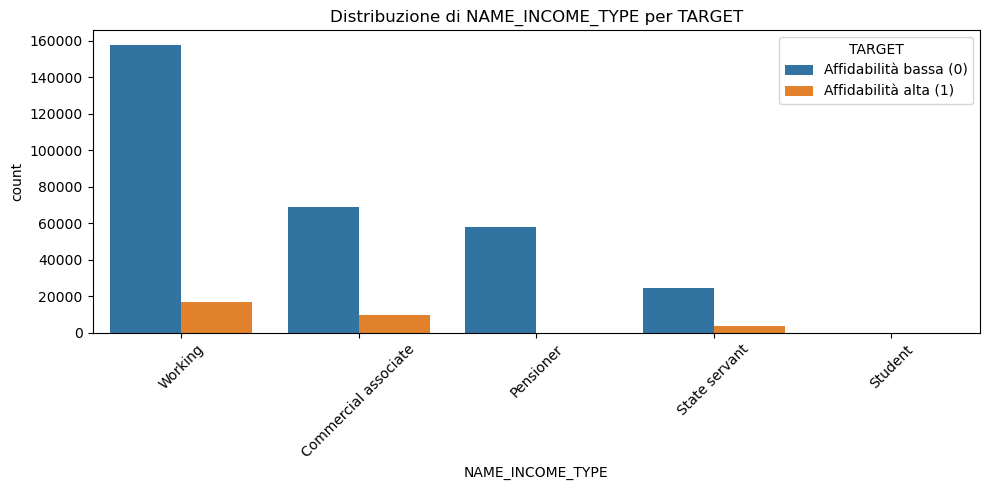

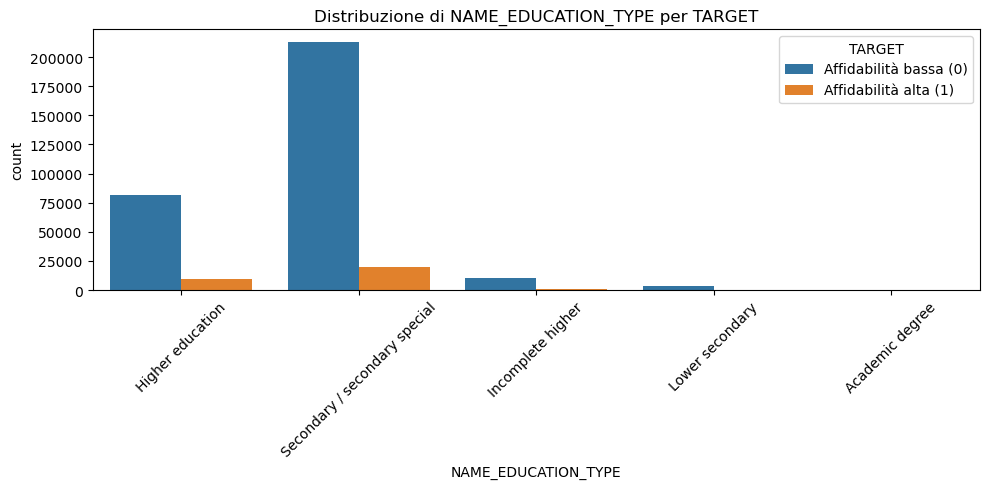

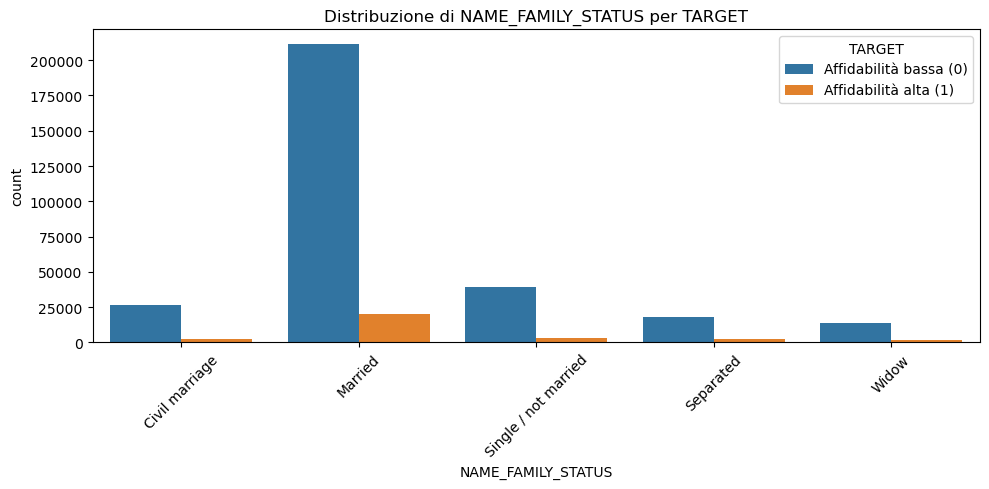

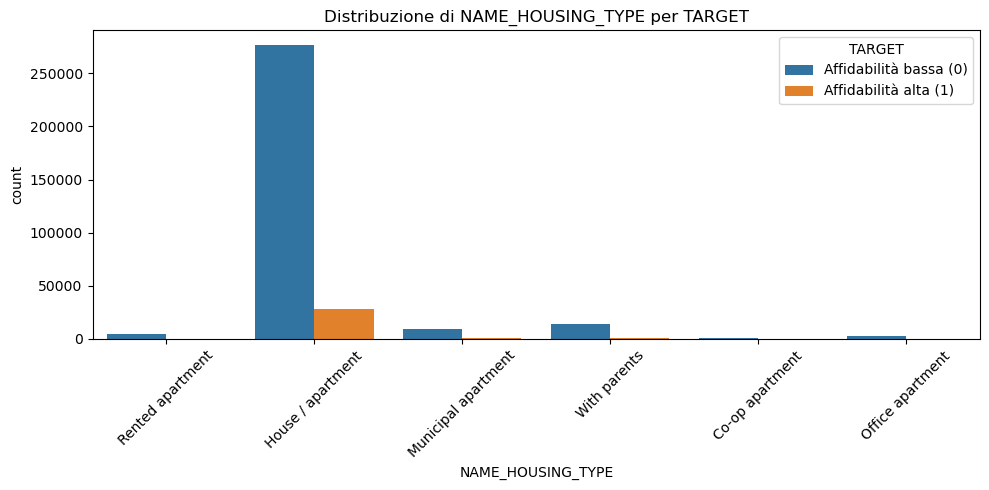

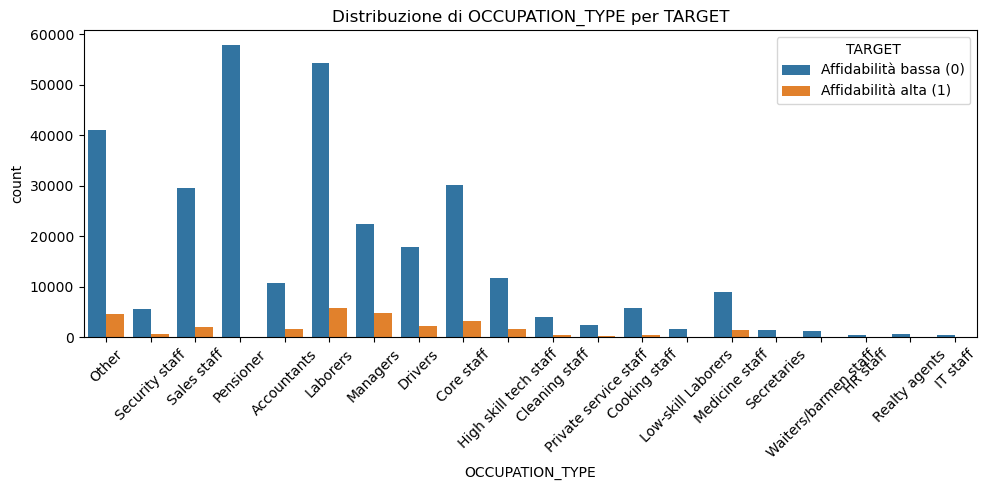

In [12]:
categorical_vars = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=var, hue='TARGET')
    plt.title(f'Distribuzione di {var} per TARGET')
    plt.legend(title='TARGET', labels=['Affidabilità bassa (0)', 'Affidabilità alta (1)'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'Distribuzione_{var}_per_TARGET.png')
    plt.show()

Dall'analisi dei grafici si può notare che in generale, il gruppo TARGET 0 (blu) è consistentemente più numeroso del gruppo TARGET 1 (arancione). Le distribuzioni non sono uniformi e mostrano chiare preferenze/tendenze in determinate categorie
Ci sono alcune categorie dominanti in quasi ogni tipo di classificazione.

### Rappresentazione grafica variabili binarie

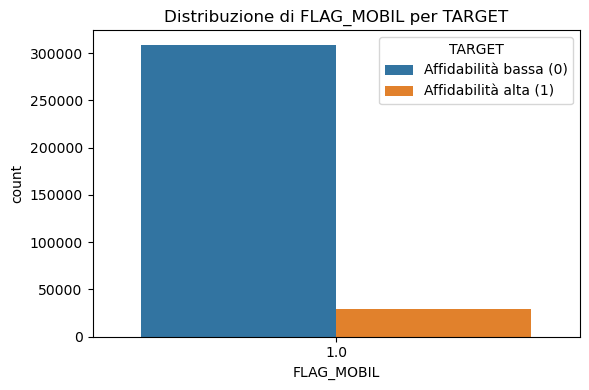

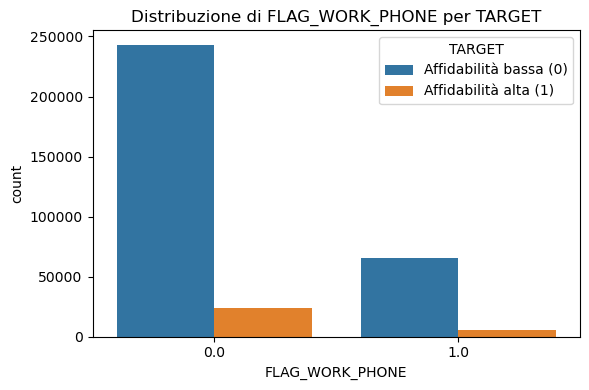

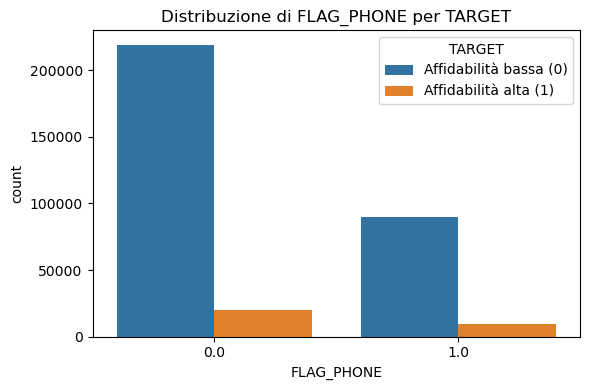

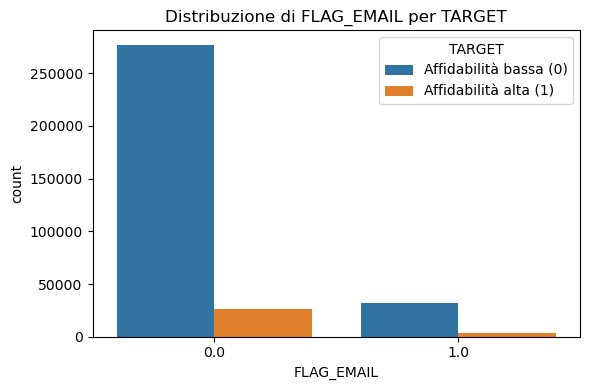

In [13]:
binary_vars = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']

for var in binary_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=var, hue='TARGET')
    plt.title(f'Distribuzione di {var} per TARGET')
    plt.legend(title='TARGET', labels=['Affidabilità bassa (0)', 'Affidabilità alta (1)'])
    plt.tight_layout()
    plt.savefig(f'Distribuzione_{var}_per_TARGET.png')
    plt.show()

In tutti i casi, il gruppo con affidabilità bassa (0) è significativamente più numeroso, il telefono mobile sembra essere il mezzo di comunicazione più diffuso con un basso uso di email e telefoni di lavoro. I telefoni fissi sono meno comuni dei mobili ma più diffusi di email e telefoni di lavoro. Le proporzioni tra chi ha/non ha questi mezzi di comunicazione tendono a mantenersi simili tra i due gruppi di affidabilità

### Rappresentazione grafica variabili numeriche

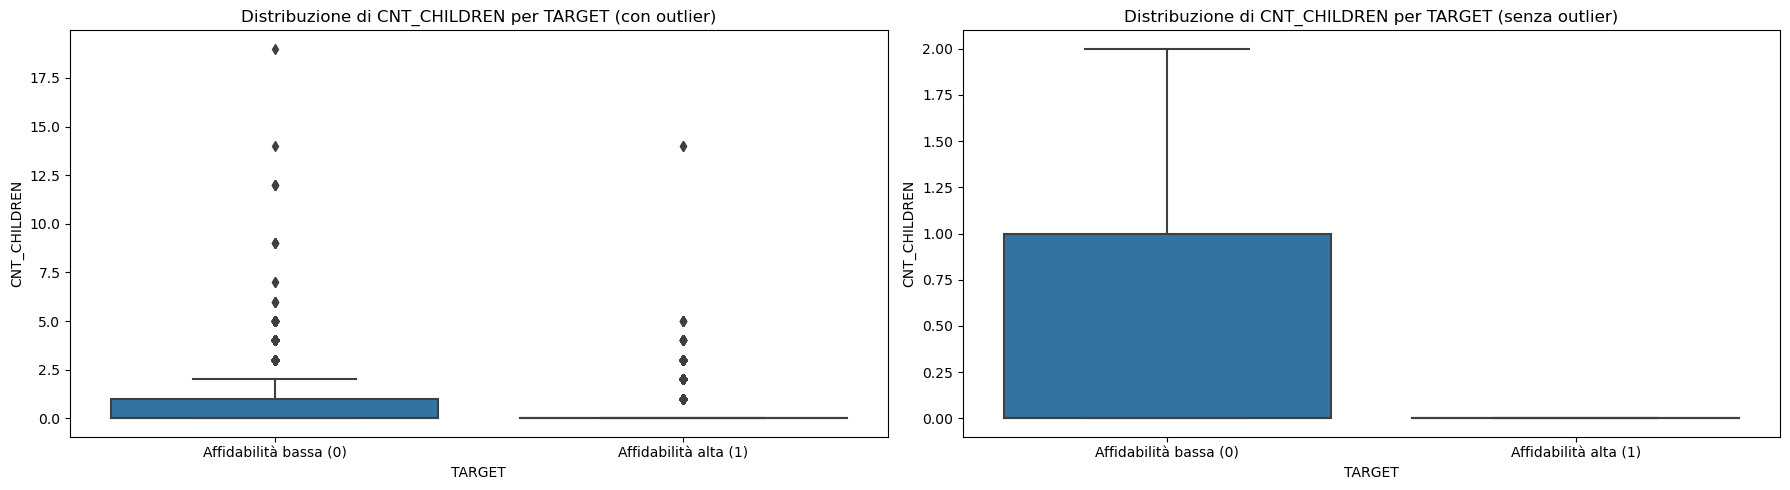

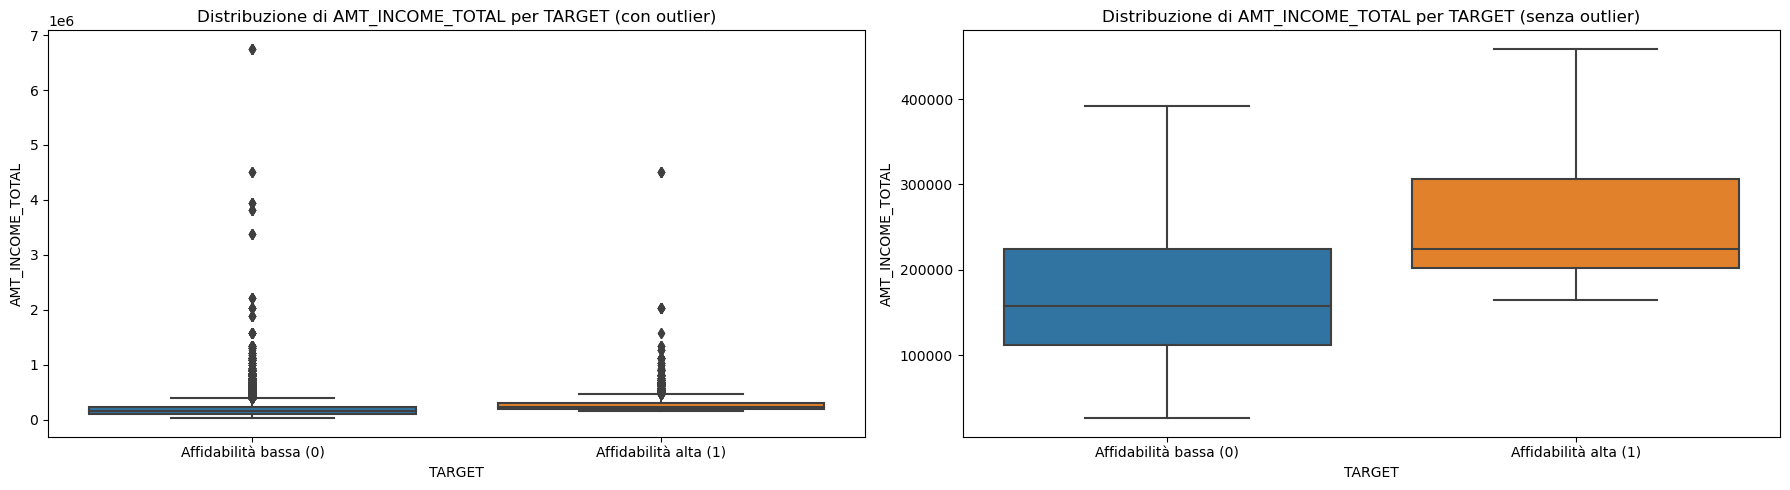

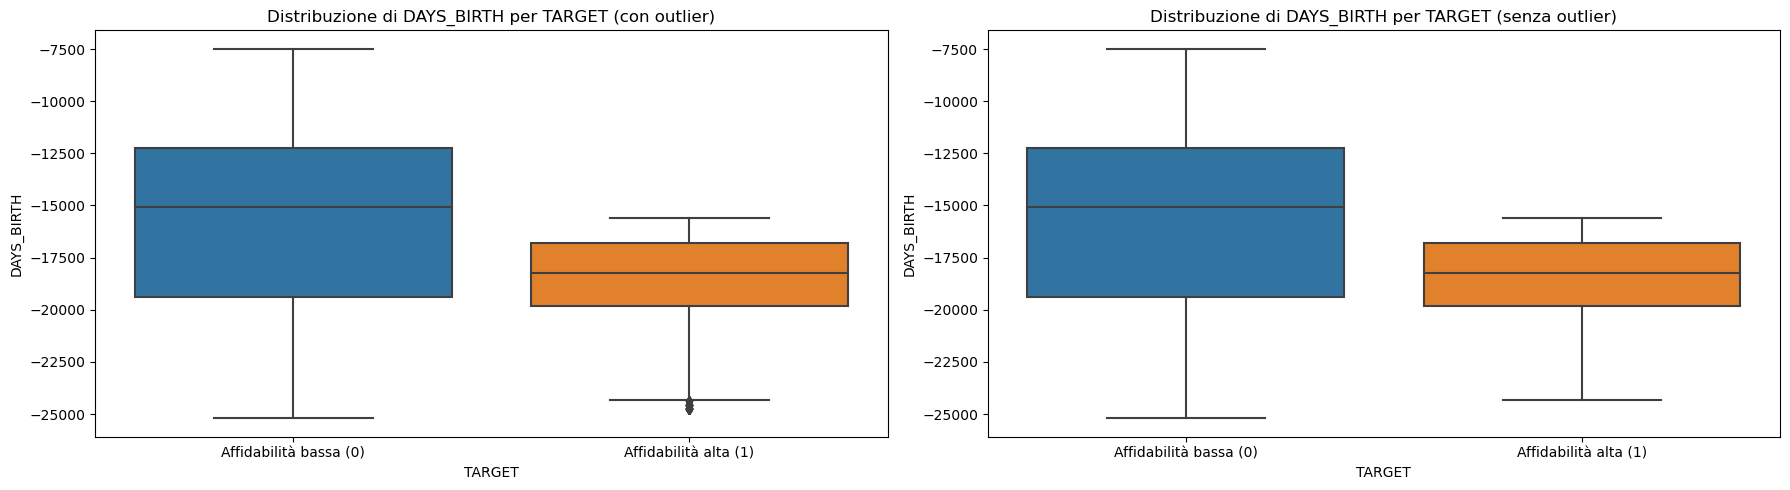

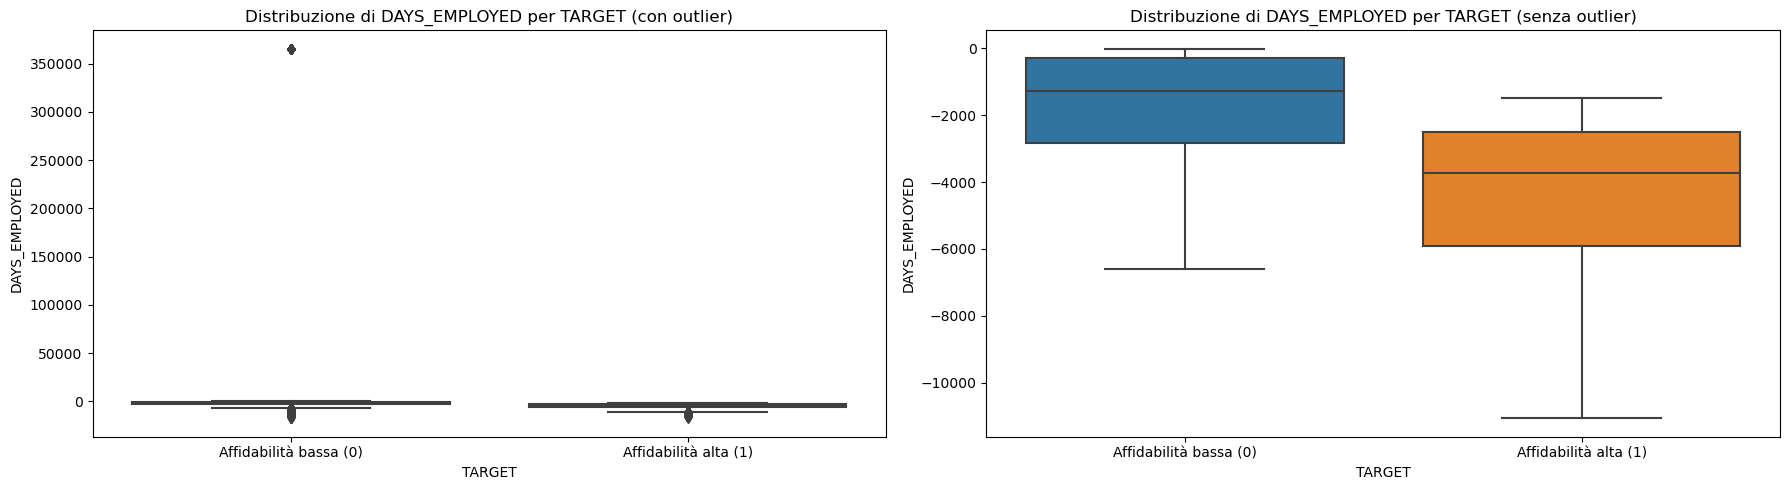

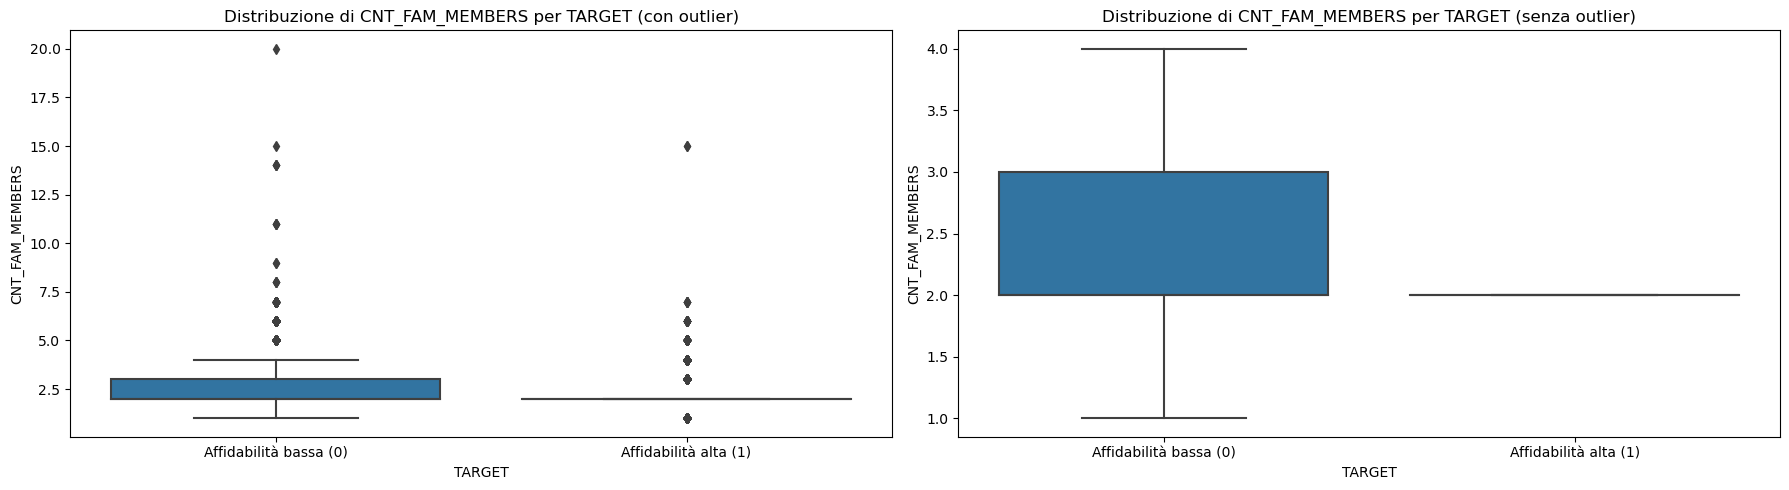

In [14]:
numerical_vars = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']

for var in numerical_vars:
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    # Grafico con outlier
    sns.boxplot(data=df, x='TARGET', y=var, ax=axes[0])
    axes[0].set_title(f'Distribuzione di {var} per TARGET (con outlier)')
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['Affidabilità bassa (0)', 'Affidabilità alta (1)'])

    # Grafico senza outlier
    sns.boxplot(data=df, x='TARGET', y=var, ax=axes[1], showfliers=False)
    axes[1].set_title(f'Distribuzione di {var} per TARGET (senza outlier)')
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['Affidabilità bassa (0)', 'Affidabilità alta (1)'])

    plt.tight_layout()
    plt.savefig(f'Distribuzione_{var}_per_TARGET.png')
    plt.show()

### Verifico lo sbilanciamento della classe target

0    91.217578
1     8.782422
Name: TARGET, dtype: float64


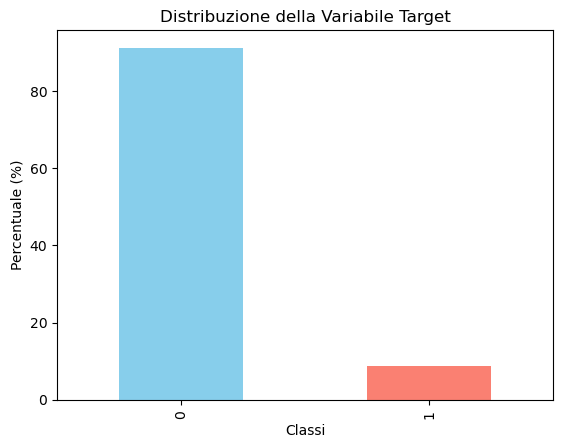

In [15]:
proportion = df['TARGET'].value_counts(normalize=True) * 100
print(proportion)

proportion.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuzione della Variabile Target')
plt.xlabel('Classi')
plt.ylabel('Percentuale (%)')
plt.show()

Come visto già precedentemente e confermato anche in questo grafico le classi della variabile target sono sbilanciate a favore della classe 0 (bassa affidabilità creditizia)

### Visualizzo eventuali duplicati

In [16]:
duplicates = df[df.duplicated(keep=False)]
display(duplicates)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET
ID,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,Other,2.0,0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,Other,2.0,0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392174,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23661.0,365243.0,1.0,0.0,0.0,0.0,Pensioner,2.0,0
6392175,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23661.0,365243.0,1.0,0.0,0.0,0.0,Pensioner,2.0,0
6392177,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23661.0,365243.0,1.0,0.0,0.0,0.0,Pensioner,2.0,0


In [17]:
df.drop_duplicates(keep='first',inplace=True)

In [18]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,TARGET
count,75256.000000,7.525600e+04,75256.000000,75256.000000,75256.0,75256.000000,75256.000000,75256.000000,75256.000000,75256.000000
mean,0.409070,1.848544e+05,-16076.620695,56591.817689,1.0,0.206974,0.282569,0.099301,2.165874,0.097932
std,0.719442,1.069342e+05,4185.574252,135218.584928,0.0,0.405139,0.450251,0.299068,0.896137,0.297225
min,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.125000e+05,-19482.000000,-3124.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.575000e+05,-15969.500000,-1493.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12600.750000,-398.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000


### Controllo le occorrenze delle variabili categoriche

In [19]:
print("NAME_INCOME_TYPE:")
print(df['NAME_INCOME_TYPE'].value_counts())
print("\nNAME_EDUCATION_TYPE:")
print(df['NAME_EDUCATION_TYPE'].value_counts())
print("\nNAME_FAMILY_STATUS:")
print(df['NAME_FAMILY_STATUS'].value_counts())
print("\nNAME_HOUSING_TYPE:")
print(df['NAME_HOUSING_TYPE'].value_counts())
print("\nOCCUPATION_TYPE:")
print(df['OCCUPATION_TYPE'].value_counts())

NAME_INCOME_TYPE:
Working                 39178
Commercial associate    18067
Pensioner               12115
State servant            5889
Student                     7
Name: NAME_INCOME_TYPE, dtype: int64

NAME_EDUCATION_TYPE:
Secondary / secondary special    52714
Higher education                 19187
Incomplete higher                 2526
Lower secondary                    782
Academic degree                     47
Name: NAME_EDUCATION_TYPE, dtype: int64

NAME_FAMILY_STATUS:
Married                 50239
Single / not married    10214
Civil marriage           6715
Separated                4703
Widow                    3385
Name: NAME_FAMILY_STATUS, dtype: int64

NAME_HOUSING_TYPE:
House / apartment      67360
With parents            3273
Municipal apartment     2642
Rented apartment        1077
Office apartment         665
Co-op apartment          239
Name: NAME_HOUSING_TYPE, dtype: int64

OCCUPATION_TYPE:
Laborers                 13955
Pensioner                12115
Other           

NAME_HOUSING_TYPE: le categorie sono sbilanciate, con "House / apartment" molto rappresentata e altre (es. "Co-op apartment") con pochissimi casi. Visto questo elevato sbilanciamento faccio una feature aggregation, aggregando le categorie meno frequenti in una categoria "Other". Successivamente utilizzo One-Hot Encoding: per rappresentare “House / apartment” e “Other” senza introdurre troppe colonne.

NAME_FAMILY_STATUS: categorie come "Married" e "Single / not married" sono ben distribuite e numerose, mentre altre categorie (es. "Widow") sono meno comuni. Utilizzo il One-Hot Encoding in quanto la variabile ha poche categorie ben distribuite e senza un ordine intrinseco.

FLAG_OWN_CAR, FLAG_OWN_REALTY e CODE_GENDER: Tutte e tre le variabili indicano proprietà binarie (ad es., possesso di un'auto o di un immobile) o genere. Le converto in 0/1.

NAME_EDUCATION_TYPE: le categorie vanno da istruzione primaria (ad esempio "Lower secondary") a istruzione universitaria e avanzata (come "Academic degree"), rappresentando un ordine implicito e un percorso gerarchico. Utilizzo Ordinal Encoding per preservare la relazione tra i livelli di istruzione.

NAME_INCOME_TYPE e OCCUPATION_TYPE: queste variabili includono categorie con distribuzioni molto differenti. Potrebbero essere trattate con il Target Encoding in quanto questo metodo permetterebbe di catturare meglio la relazione tra ciascuna categoria e il target. Per evitare problemi di data leakage  applico una cross-validation durante il target encoding per evitare problemi.

Per le variabili: DAYS_BIRTH e DAYS_EMPLOYED le converto in anni.

Invece le variabili FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL le unisco creando un unica variabile che riporta il numero di quanti metodi di contatto sono presenti.

### Preprocessing Variabili Categoriche

In [20]:
#Creo in NAME_HOUSING_TYPE due variabili House/aprtment e Other
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].apply(
    lambda x: 'House / apartment' if x == 'House / apartment' else 'Other'
)

print(df['NAME_HOUSING_TYPE'].value_counts())

House / apartment    67360
Other                 7896
Name: NAME_HOUSING_TYPE, dtype: int64


In [21]:
df = pd.get_dummies(df,columns=["NAME_HOUSING_TYPE"], prefix = None)
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Other
ID,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,-12005.0,-4542.0,1.0,1.0,0.0,0.0,Other,2.0,0,0,1
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,0,1,0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1,1,0
5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,-22464.0,365243.0,1.0,0.0,0.0,0.0,Pensioner,1.0,0,1,0
5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,-16872.0,-769.0,1.0,1.0,1.0,1.0,Accountants,2.0,0,1,0


In [22]:
# One-Hot Encoding per NAME_FAMILY_STATUS
df = pd.get_dummies(df,columns=["NAME_FAMILY_STATUS"], prefix =None) # prefix="col",  prefix_sep='-''
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Other,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
ID,,,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,-12005.0,-4542.0,1.0,...,Other,2.0,0,0,1,1,0,0,0,0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,-21474.0,-1134.0,1.0,...,Security staff,2.0,0,1,0,0,1,0,0,0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,-19110.0,-3051.0,1.0,...,Sales staff,1.0,1,1,0,0,0,0,1,0
5008812,F,N,Y,0,283500.0,Pensioner,Higher education,-22464.0,365243.0,1.0,...,Pensioner,1.0,0,1,0,0,0,1,0,0
5008815,M,Y,Y,0,270000.0,Working,Higher education,-16872.0,-769.0,1.0,...,Accountants,2.0,0,1,0,0,1,0,0,0


In [23]:
# Per FLAG_OWN_CAR, FLAG_OWN_REALTY, CODE_GENDER conversione diretta in binarie
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})
df['CODE_GENDER'] = df['CODE_GENDER'].map({'M': 1, 'F': 0})
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,TARGET,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Other,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
ID,,,,,,,,,,,,,,,,,,,,,
5008804,1,1,1,0,427500.0,Working,Higher education,-12005.0,-4542.0,1.0,...,Other,2.0,0,0,1,1,0,0,0,0
5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,-21474.0,-1134.0,1.0,...,Security staff,2.0,0,1,0,0,1,0,0,0
5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,-19110.0,-3051.0,1.0,...,Sales staff,1.0,1,1,0,0,0,0,1,0
5008812,0,0,1,0,283500.0,Pensioner,Higher education,-22464.0,365243.0,1.0,...,Pensioner,1.0,0,1,0,0,0,1,0,0
5008815,1,1,1,0,270000.0,Working,Higher education,-16872.0,-769.0,1.0,...,Accountants,2.0,0,1,0,0,1,0,0,0


In [24]:
# Label Encoding per NAME_EDUCATION_TYPE
education_order = ['Lower secondary', 'Secondary / secondary special', 
                  'Incomplete higher', 'Higher education', 'Academic degree']
                  
education_map = {val: idx for idx, val in enumerate(education_order)}
df['EDUCATION_ENCODED'] = df['NAME_EDUCATION_TYPE'].map(education_map)
df.drop(columns=['NAME_EDUCATION_TYPE'], inplace=True)
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,CNT_FAM_MEMBERS,TARGET,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Other,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,EDUCATION_ENCODED
ID,,,,,,,,,,,,,,,,,,,,,
5008804,1,1,1,0,427500.0,Working,-12005.0,-4542.0,1.0,1.0,...,2.0,0,0,1,1,0,0,0,0,3
5008806,1,1,1,0,112500.0,Working,-21474.0,-1134.0,1.0,0.0,...,2.0,0,1,0,0,1,0,0,0,1
5008808,0,0,1,0,270000.0,Commercial associate,-19110.0,-3051.0,1.0,0.0,...,1.0,1,1,0,0,0,0,1,0,1
5008812,0,0,1,0,283500.0,Pensioner,-22464.0,365243.0,1.0,0.0,...,1.0,0,1,0,0,0,1,0,0,3
5008815,1,1,1,0,270000.0,Working,-16872.0,-769.0,1.0,1.0,...,2.0,0,1,0,0,1,0,0,0,3


In [25]:
#Encoding per OCCUPATION_TYPE
df = df.reset_index(drop=True)

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)

df['OCCUPATION_TYPE_encoded'] = 0


global_mean = df['TARGET'].mean()

for train_idx, val_idx in kf.split(df):
    train_df, val_df = df.iloc[train_idx], df.iloc[val_idx]
    occupation_means = train_df.groupby('OCCUPATION_TYPE')['TARGET'].mean()

    df.loc[val_idx, 'OCCUPATION_TYPE_encoded'] = val_df['OCCUPATION_TYPE'].map(occupation_means)
    
df['OCCUPATION_TYPE_encoded'].fillna(global_mean, inplace=True)
df.drop(columns=['OCCUPATION_TYPE'], inplace=True)

In [26]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,...,TARGET,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Other,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,EDUCATION_ENCODED,OCCUPATION_TYPE_encoded
0,1,1,1,0,427500.0,Working,-12005.0,-4542.0,1.0,1.0,...,0,0,1,1,0,0,0,0,3,0.116992
1,1,1,1,0,112500.0,Working,-21474.0,-1134.0,1.0,0.0,...,0,1,0,0,1,0,0,0,1,0.104866
2,0,0,1,0,270000.0,Commercial associate,-19110.0,-3051.0,1.0,0.0,...,1,1,0,0,0,0,1,0,1,0.072081
3,0,0,1,0,283500.0,Pensioner,-22464.0,365243.0,1.0,0.0,...,0,1,0,0,0,1,0,0,3,0.000000
4,1,1,1,0,270000.0,Working,-16872.0,-769.0,1.0,1.0,...,0,1,0,0,1,0,0,0,3,0.138728


In [27]:
#Encoding per NAME_INCOME_TYPE
df = df.reset_index(drop=True)

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)

df['NAME_INCOME_TYPE_encoded'] = 0

global_mean = df['TARGET'].mean()

for train_idx, val_idx in kf.split(df):
    train_df, val_df = df.iloc[train_idx], df.iloc[val_idx]
    occupation_means = train_df.groupby('NAME_INCOME_TYPE')['TARGET'].mean()
    df.loc[val_idx, 'NAME_INCOME_TYPE_encoded'] = val_df['NAME_INCOME_TYPE'].map(occupation_means)

df['NAME_INCOME_TYPE_encoded'].fillna(global_mean, inplace=True)
df.drop(columns=['NAME_INCOME_TYPE'], inplace=True)

In [28]:
# Trasformo DAYS_BIRTH da giorni negativi ad anni positivi
df['AGE_YEARS'] = (-df['DAYS_BIRTH'] / 365).round(1)  # Calcolo approssimativo in anni

# Trasformo DAYS_EMPLOYED in anni positivi per i giorni di impiego effettivo
df['YEARS_EMPLOYED'] = (-df['DAYS_EMPLOYED'] / 365).round(1)

# Separo i periodi di disoccupazione (valori positivi)
df['YEARS_UNEMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: x / 365 if x > 0 else 0).round(1)

df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True)

df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,EDUCATION_ENCODED,OCCUPATION_TYPE_encoded,NAME_INCOME_TYPE_encoded,AGE_YEARS,YEARS_EMPLOYED,YEARS_UNEMPLOYED
0,1,1,1,0,427500.0,1.0,1.0,0.0,0.0,2.0,...,0,0,0,0,3,0.116992,0.104133,32.9,12.4,0.0
1,1,1,1,0,112500.0,1.0,0.0,0.0,0.0,2.0,...,1,0,0,0,1,0.104866,0.102869,58.8,3.1,0.0
2,0,0,1,0,270000.0,1.0,0.0,1.0,1.0,1.0,...,0,0,1,0,1,0.072081,0.135848,52.4,8.4,0.0
3,0,0,1,0,283500.0,1.0,0.0,0.0,0.0,1.0,...,0,1,0,0,3,0.000000,0.000000,61.5,-1000.7,1000.7
4,1,1,1,0,270000.0,1.0,1.0,1.0,1.0,2.0,...,1,0,0,0,3,0.138728,0.104133,46.2,2.1,0.0


### Accorpo le colonne FLAG in un unica colonna che indica quanti recapiti sono disponibili

In [29]:
df['NUM_CONTACTS'] = df[['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']].sum(axis=1)
df.drop(columns=['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], inplace=True)
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,TARGET,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Other,NAME_FAMILY_STATUS_Civil marriage,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,EDUCATION_ENCODED,OCCUPATION_TYPE_encoded,NAME_INCOME_TYPE_encoded,AGE_YEARS,YEARS_EMPLOYED,YEARS_UNEMPLOYED,NUM_CONTACTS
0,1,1,1,0,427500.0,2.0,0,0,1,1,...,0,0,0,3,0.116992,0.104133,32.9,12.4,0.0,2.0
1,1,1,1,0,112500.0,2.0,0,1,0,0,...,0,0,0,1,0.104866,0.102869,58.8,3.1,0.0,1.0
2,0,0,1,0,270000.0,1.0,1,1,0,0,...,0,1,0,1,0.072081,0.135848,52.4,8.4,0.0,3.0
3,0,0,1,0,283500.0,1.0,0,1,0,0,...,1,0,0,3,0.000000,0.000000,61.5,-1000.7,1000.7,1.0
4,1,1,1,0,270000.0,2.0,0,1,0,0,...,0,0,0,3,0.138728,0.104133,46.2,2.1,0.0,4.0


In [30]:
# Sposta la variabile TARGET alla fine
target = df.pop('TARGET') 
df['TARGET'] = target    

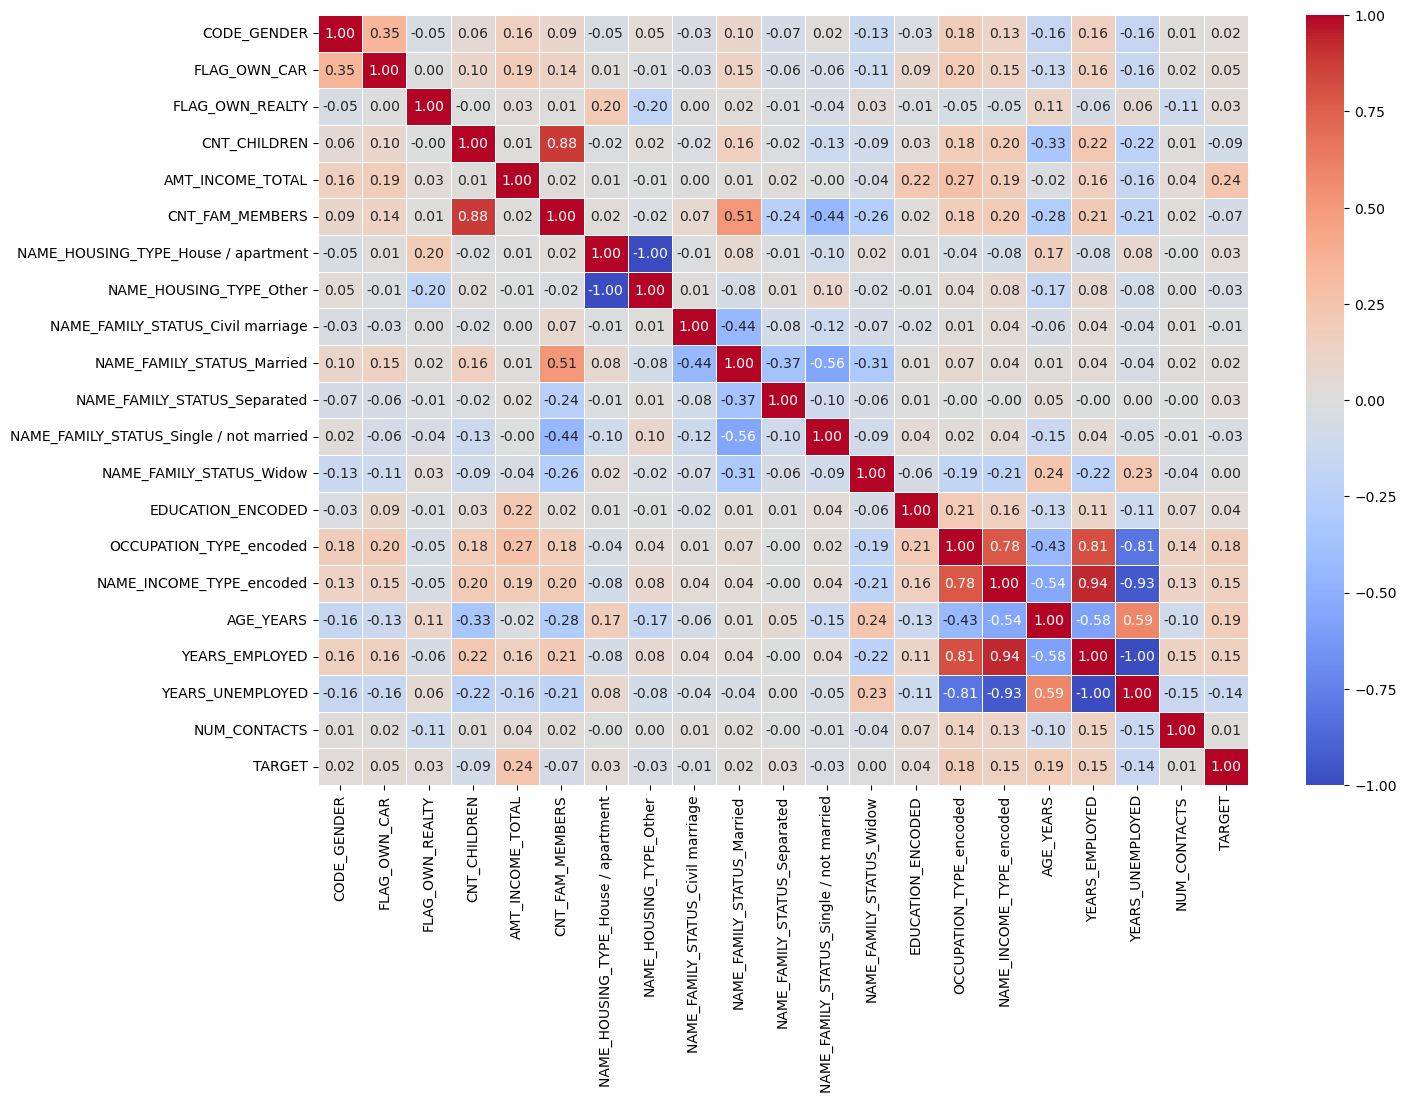

In [31]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.savefig('correlation_matrix.png')
plt.show()

Le correlazioni più significative con la variabile TARGET sono:
AMT_INCOME_TOTAL: +0.24 - Correlazione positiva debole, suggerisce che al crescere del reddito totale aumenta leggermente la probabilità di essere target
AGE_YEARS: +0.19 - Correlazione positiva molto debole con l'età
YEARS_EMPLOYED e OCCUPATION_TYPE_encoded: +0.15 e +0.18 rispettivamente - Correlazioni positive molto deboli con gli anni di impiego e il tipo di occupazione
YEARS_UNEMPLOYED: -0.14 - Correlazione negativa molto debole, indica che periodi più lunghi di disoccupazione sono leggermente associati a una minore probabilità di essere target

La maggior parte delle altre variabili mostra correlazioni molto deboli (< |0.10|) con la TARGET, suggerendo che singolarmente hanno poca influenza predittiva. È interessante notare che nessuna variabile presenta correlazioni forti (> |0.5|) con la TARGET.

### Divido il dataset in X e y, dove y è la variabile "Target" e X è costituito da tutte le altre variabili da utilizzare per l'addestramento del modello di ML

In [32]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(X)
print(y)

[[ 1.0000e+00  1.0000e+00  1.0000e+00 ...  1.2400e+01  0.0000e+00
   2.0000e+00]
 [ 1.0000e+00  1.0000e+00  1.0000e+00 ...  3.1000e+00  0.0000e+00
   1.0000e+00]
 [ 0.0000e+00  0.0000e+00  1.0000e+00 ...  8.4000e+00  0.0000e+00
   3.0000e+00]
 ...
 [ 0.0000e+00  1.0000e+00  1.0000e+00 ...  6.4000e+00  0.0000e+00
   2.0000e+00]
 [ 1.0000e+00  1.0000e+00  1.0000e+00 ...  1.8000e+00  0.0000e+00
   2.0000e+00]
 [ 0.0000e+00  0.0000e+00  1.0000e+00 ... -1.0007e+03  1.0007e+03
   1.0000e+00]]
[0 0 1 ... 0 0 0]


### Gestione dello sbilanciamento

In [33]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
weight_dict = dict(zip(np.unique(y), class_weights))
print(weight_dict)

{0: 0.5542821789470583, 1: 5.105563093622795}


### Suddivisione del dataset in train e test

In [34]:
RANDOM_SEED = 0

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

In [36]:
proportion = pd.Series(y_test).value_counts(normalize=True) * 100
print(proportion)

0    90.207281
1     9.792719
dtype: float64


In [37]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Addresto un modello di regressione logistica

In [38]:
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

### Funzione di valutazione delle performance del modello

In [39]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_proba_train = model.predict_proba(X_train)[:, 1]
    
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_roc_auc = roc_auc_score(y_train, y_proba_train)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_roc_auc = roc_auc_score(y_test, y_proba_test)
    
    print(f"TRAIN Accuracy: {train_accuracy:.2f}")
    print(f"TRAIN F1 Score: {train_f1:.2f}")
    print(f"TRAIN ROC AUC: {train_roc_auc:.2f}")
    
    print(f"TEST Accuracy: {test_accuracy:.2f}")
    print(f"TEST F1 Score: {test_f1:.2f}")
    print(f"TEST ROC AUC: {test_roc_auc:.2f}")
    
    print("\nTEST REPORT")
    print(classification_report(y_test, y_pred_test))
    
    print("\nConfusion Matrix - Training Set")
    plot_confusion_matrix(y_train, y_pred_train)
    
    print("\nConfusion Matrix - Test Set")
    plot_confusion_matrix(y_test, y_pred_test)

def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precision_recall=True):
    cm = confusion_matrix(y_true, y_pred)

    df_cm = pd.DataFrame(cm, index=labels,
                         columns=["Predicted " + labels[0], "Predicted " + labels[1]])
    sns.heatmap(df_cm, annot=True, fmt='g')

    if show_precision_recall:
        precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
        recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
        plt.text(0, -0.1, f"Precision: {precision:.3f}")
        plt.text(1, -0.1, f"Recall: {recall:.3f}")
    plt.show()


Valutazione del modello:
TRAIN Accuracy: 0.80
TRAIN F1 Score: 0.47
TRAIN ROC AUC: 0.90
TEST Accuracy: 0.80
TEST F1 Score: 0.46
TEST ROC AUC: 0.90

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.79      0.88     13578
           1       0.31      0.88      0.46      1474

    accuracy                           0.80     15052
   macro avg       0.65      0.83      0.67     15052
weighted avg       0.92      0.80      0.84     15052


Confusion Matrix - Training Set


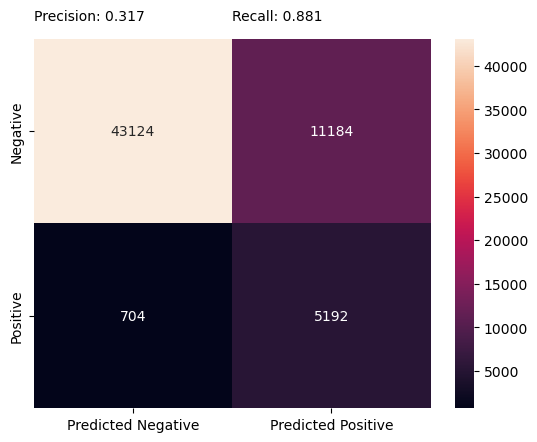


Confusion Matrix - Test Set


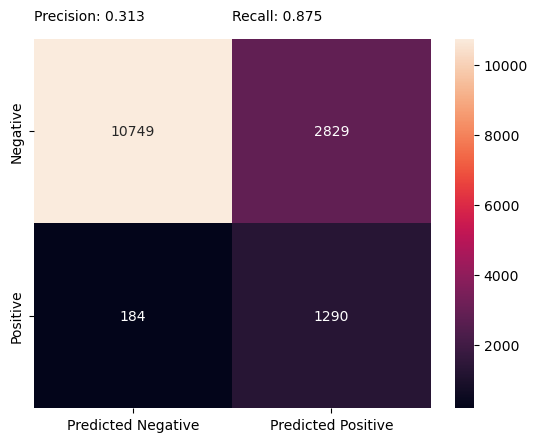

In [40]:
print("\nValutazione del modello:")
evaluate_model(lr, X_train, y_train, X_test, y_test)

### Regolarizzazione con Modello Ridge


Valutazione del modello Ridge:
TRAIN Accuracy: 0.90
TRAIN F1 Score: 0.22
TRAIN ROC AUC: 0.90
TEST Accuracy: 0.90
TEST F1 Score: 0.21
TEST ROC AUC: 0.89

TEST REPORT
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     13578
           1       0.44      0.14      0.21      1474

    accuracy                           0.90     15052
   macro avg       0.67      0.56      0.58     15052
weighted avg       0.87      0.90      0.87     15052


Confusion Matrix - Training Set


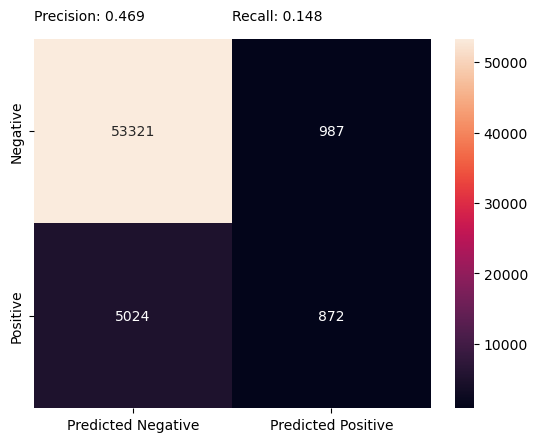


Confusion Matrix - Test Set


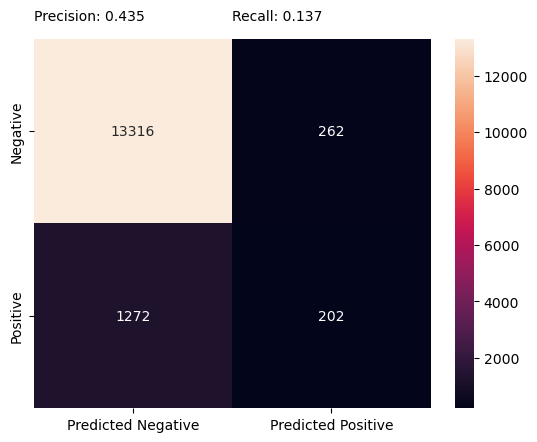

In [41]:
# Regressione Logistica Ridge (Penalizzazione L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear')
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("\nValutazione del modello Ridge:")
evaluate_model(ridge_model, X_train, y_train, X_test, y_test)


Valutazione del modello Lasso:
TRAIN Accuracy: 0.90
TRAIN F1 Score: 0.24
TRAIN ROC AUC: 0.90
TEST Accuracy: 0.90
TEST F1 Score: 0.23
TEST ROC AUC: 0.90

TEST REPORT
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     13578
           1       0.44      0.15      0.23      1474

    accuracy                           0.90     15052
   macro avg       0.68      0.57      0.59     15052
weighted avg       0.87      0.90      0.87     15052


Confusion Matrix - Training Set


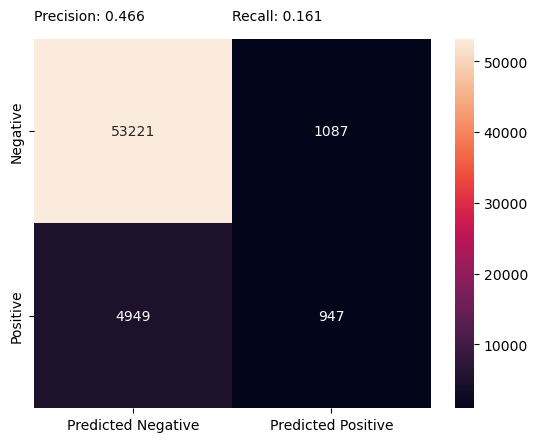


Confusion Matrix - Test Set


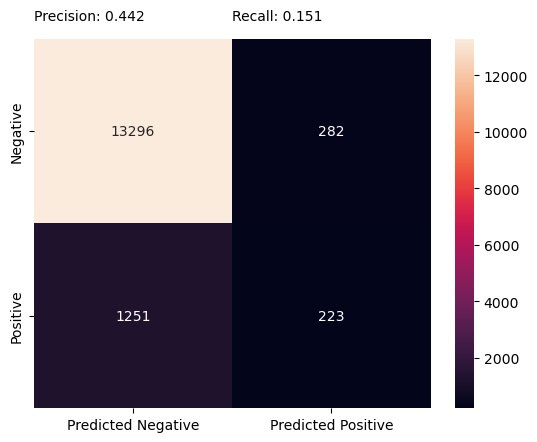

In [42]:
# Regressione Logistica Lasso
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
print("\nValutazione del modello Lasso:")
evaluate_model(lasso_model, X_train, y_train, X_test, y_test)

### Riaddestro il modello sul training set con l'undersampling e l'oversampling

In [43]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
pipeline = Pipeline([('over', over), ('under', under)])
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced')


Valutazione del modello LR con Undersampling e Oversampling:
TRAIN Accuracy: 0.83
TRAIN F1 Score: 0.78
TRAIN ROC AUC: 0.90
TEST Accuracy: 0.80
TEST F1 Score: 0.46
TEST ROC AUC: 0.90

TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.79      0.88     13578
           1       0.32      0.87      0.46      1474

    accuracy                           0.80     15052
   macro avg       0.65      0.83      0.67     15052
weighted avg       0.92      0.80      0.84     15052


Confusion Matrix - Training Set


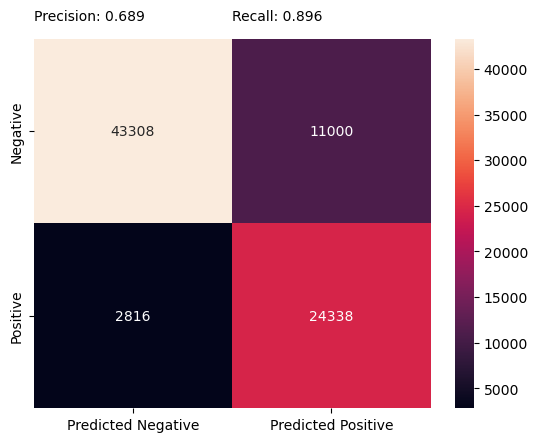


Confusion Matrix - Test Set


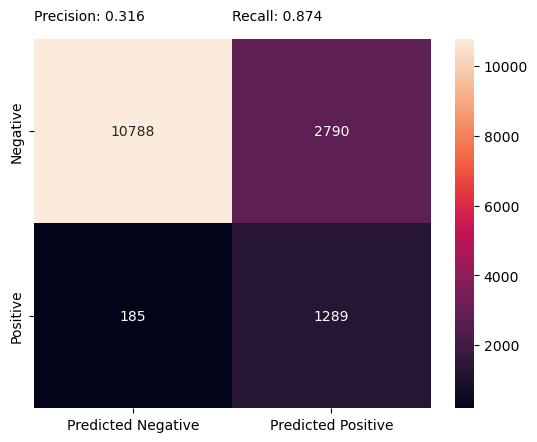

In [44]:
print("\nValutazione del modello LR con Undersampling e Oversampling:")
evaluate_model(lr, X_train_resampled, y_train_resampled, X_test, y_test)

Valutazione del modello Lasso:
TRAIN Accuracy: 0.82
TRAIN F1 Score: 0.72
TRAIN ROC AUC: 0.90
TEST Accuracy: 0.85
TEST F1 Score: 0.48
TEST ROC AUC: 0.90

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     13578
           1       0.36      0.69      0.48      1474

    accuracy                           0.85     15052
   macro avg       0.66      0.78      0.69     15052
weighted avg       0.90      0.85      0.87     15052


Confusion Matrix - Training Set


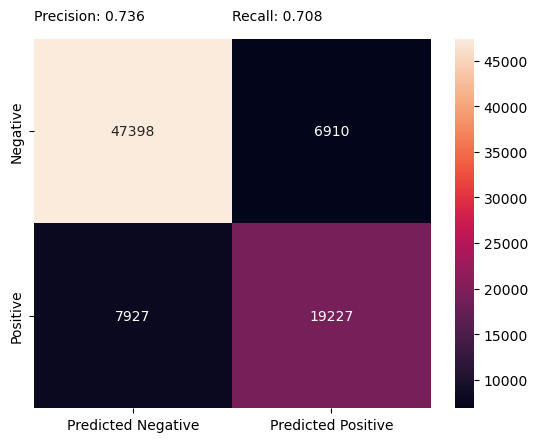


Confusion Matrix - Test Set


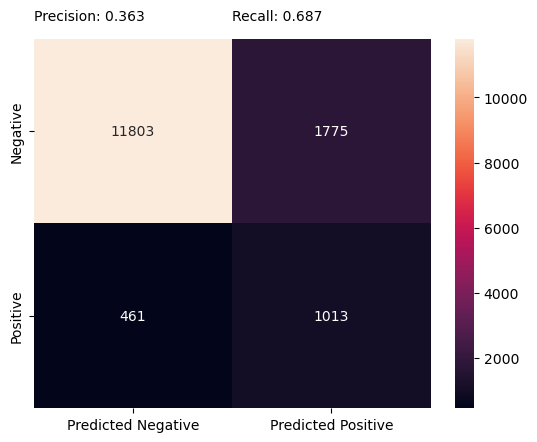

In [45]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
print("Valutazione del modello Lasso:")
evaluate_model(lasso_model, X_train_resampled, y_train_resampled, X_test, y_test)


Valutazione del modello Ridge:
TRAIN Accuracy: 0.81
TRAIN F1 Score: 0.72
TRAIN ROC AUC: 0.90
TEST Accuracy: 0.85
TEST F1 Score: 0.47
TEST ROC AUC: 0.90

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     13578
           1       0.36      0.68      0.47      1474

    accuracy                           0.85     15052
   macro avg       0.66      0.78      0.69     15052
weighted avg       0.90      0.85      0.87     15052


Confusion Matrix - Training Set


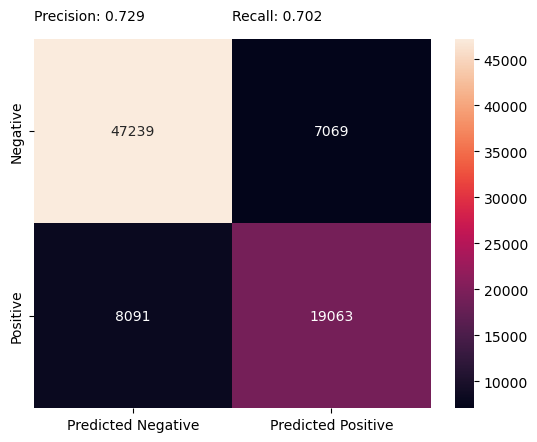


Confusion Matrix - Test Set


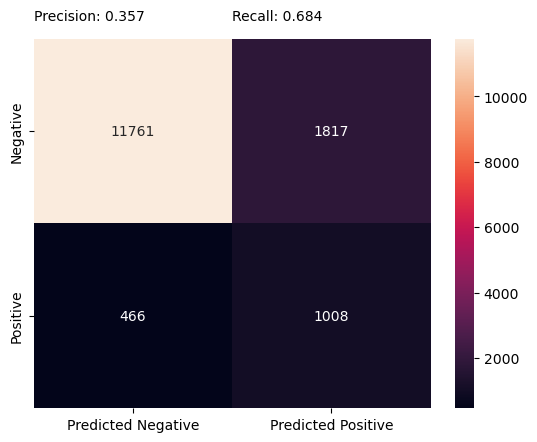

In [46]:
ridge_model = LogisticRegression(penalty='l2', solver='liblinear')
print("\nValutazione del modello Ridge:")
evaluate_model(ridge_model, X_train_resampled, y_train_resampled, X_test, y_test)

### Addestro un modello Random Forest

In [53]:
for n_tree in [1, 2, 3, 5, 10, 20, 50, 100, 500, 1000]:
  print(f"Addestramento di una foresta con {n_tree} alberi...")
  forest = RandomForestClassifier(n_tree, random_state=RANDOM_SEED, max_depth=10, min_samples_leaf=5, class_weight="balanced")
  forest.fit(X_train, y_train)
  print(f"Accuracy: Train={forest.score(X_train, y_train):.3f} Test={forest.score(X_test, y_test):.3f}")

Addestramento di una foresta con 1 alberi...
Accuracy: Train=0.882 Test=0.880
Addestramento di una foresta con 2 alberi...
Accuracy: Train=0.923 Test=0.922
Addestramento di una foresta con 3 alberi...
Accuracy: Train=0.922 Test=0.921
Addestramento di una foresta con 5 alberi...
Accuracy: Train=0.922 Test=0.921
Addestramento di una foresta con 10 alberi...
Accuracy: Train=0.923 Test=0.922
Addestramento di una foresta con 20 alberi...
Accuracy: Train=0.923 Test=0.922
Addestramento di una foresta con 50 alberi...
Accuracy: Train=0.923 Test=0.922
Addestramento di una foresta con 100 alberi...
Accuracy: Train=0.923 Test=0.922
Addestramento di una foresta con 500 alberi...
Accuracy: Train=0.923 Test=0.922
Addestramento di una foresta con 1000 alberi...
Accuracy: Train=0.923 Test=0.922


L'accuracy del set di train e di test del rando forest successivamente i 10 alberi non cambia. Per questo motivo si è scelto di utilizzare una foresta con 10 alberi.

In [54]:
forest = RandomForestClassifier(10, random_state=RANDOM_SEED, max_depth=10, min_samples_leaf=5, class_weight="balanced")
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=10, random_state=0)

TRAIN Accuracy: 0.92
TRAIN F1 Score: 0.72
TRAIN ROC AUC: 0.96
TEST Accuracy: 0.92
TEST F1 Score: 0.72
TEST ROC AUC: 0.95

TEST REPORT
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     13578
           1       0.56      1.00      0.72      1474

    accuracy                           0.92     15052
   macro avg       0.78      0.96      0.84     15052
weighted avg       0.96      0.92      0.93     15052


Confusion Matrix - Training Set


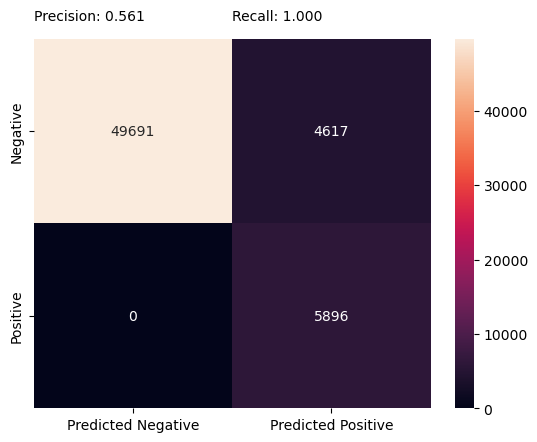


Confusion Matrix - Test Set


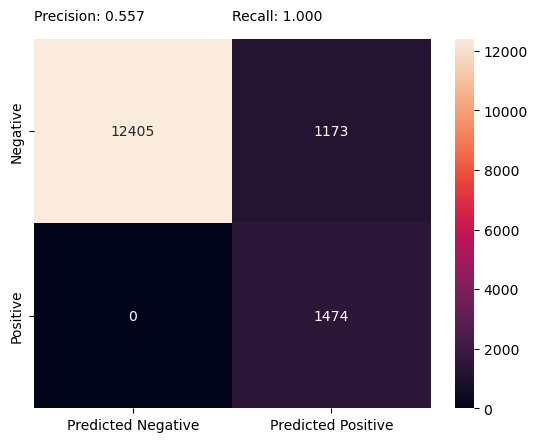

In [57]:
evaluate_model(forest, X_train, y_train, X_test, y_test)

Confronto Modelli:

Random Forest emerge come il miglior modello:
Accuracy più alta (92%)
F1-Score migliore (0.72)
ROC AUC più alto (0.95)
Ottimo bilanciamento tra precision (0.56) e recall (1.00) per la classe minoritaria

Regressione Logistica con varie configurazioni:
Base: ROC AUC 0.90, F1-Score 0.46
Ridge: ROC AUC 0.89, F1-Score 0.21
Lasso: ROC AUC 0.90, F1-Score 0.23
Con sampling: ROC AUC 0.90, F1-Score 0.46

### Indicazioni di interpretabilità

In [68]:
import shap
shap.initjs()

In [76]:
explainer = shap.TreeExplainer(forest)

In [77]:
df.loc[[400]]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Other,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,EDUCATION_ENCODED,OCCUPATION_TYPE_encoded,NAME_INCOME_TYPE_encoded,AGE_YEARS,YEARS_EMPLOYED,YEARS_UNEMPLOYED,NUM_CONTACTS,TARGET
400,0,0,0,0,256500.0,2.0,1,0,0,1,...,0,0,3,0.145631,0.133861,30.7,7.0,0.0,2.0,0


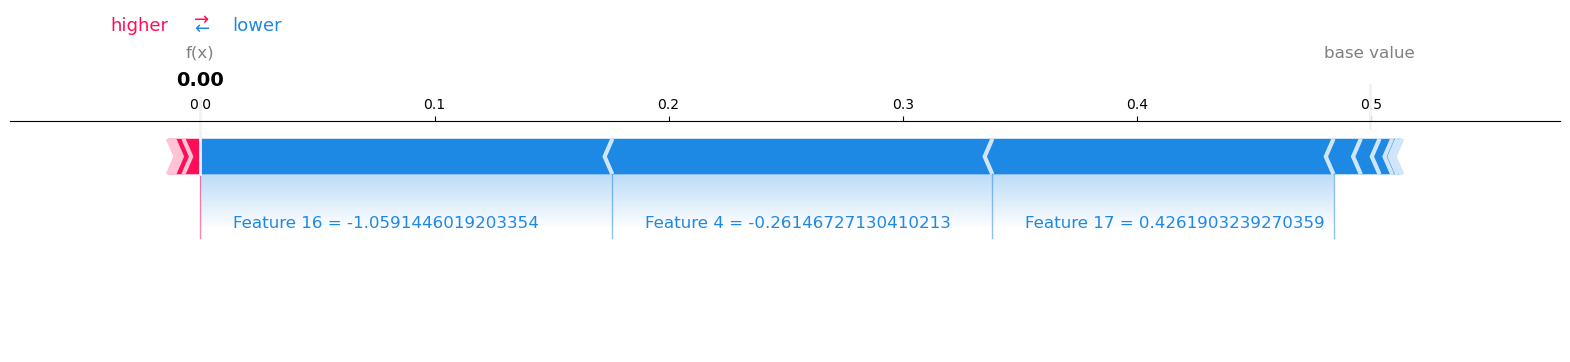

In [78]:
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance, matplotlib=True)
plt.show()

La visualizzazione SHAP (force plot)  mostra come le diverse feature contribuiscono alla previsione del modello per una specifica istanza. Il Base value è 0.0
Contributi delle feature: Feature 16: ha un forte impatto negativo (-1.059), spingendo la previsione verso il basso
Feature 4: ha un impatto negativo moderato (-0.261), contribuendo anche questa a spingere la previsione verso il basso
Feature 17: ha un impatto positivo (+0.426), che spinge la previsione verso l'alto
